In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [30]:
n = 10000
x = np.random.rand(n)
y = np.random.rand(n)
z = x + y

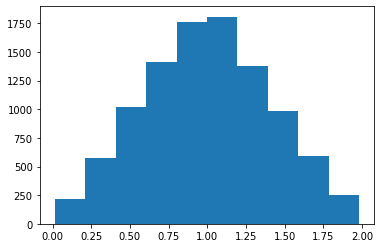

In [31]:
_ = plt.hist(z)

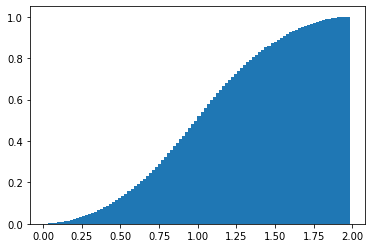

In [32]:
_ = plt.hist(z, cumulative=1, density=1, bins=100)

In [33]:
def emp_f(x, t):
    return (x <= t).mean()

In [34]:
t = np.linspace(0, 2, 100)
res = [emp_f(z, t_) for t_ in t]

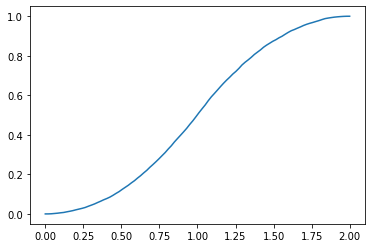

In [35]:
plt.plot(t, res)

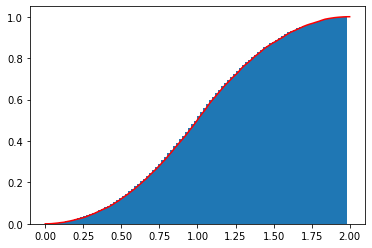

In [36]:
_ = plt.hist(z, cumulative=1, density=1, bins=100)
plt.plot(t, res, color='red')

In [37]:
np.var(z), np.mean(z)

(0.16539675387627586, 0.9996795002922565)

In [38]:
sigma = np.var(z)
mean = np.mean(z)

In [39]:
mean, sigma

(0.9996795002922565, 0.16539675387627586)

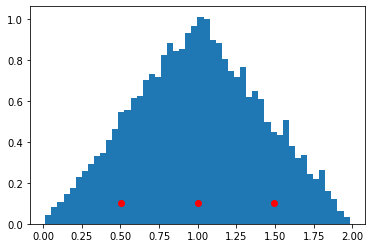

In [44]:
_ = plt.hist(z, bins=50, density=1)
plt.scatter([mean - 3 * sigma, mean, mean + 3 * sigma], [0.1] * 3, color='red')

In [41]:
lb = mean - 3 * sigma
rb = mean + 3 * sigma

In [42]:
np.bitwise_or(z < lb, z > rb).mean()

0.2493

# Приклад генерації відео (декілька способів)

In [ ]:
# CV2

img = np.ones((400, 400, 3))

plt.imshow(img)
k = 0
plt.savefig('imgs/{}.jpg'.format(k + 1000))

import cv2

cv2.imwrite('img.jpg', (img * 255).astype(np.uint8))

base_img = (img * 255).astype(np.uint8)

rand_img = npr.randint(0, 256, size=(400, 400, 3))
plt.imshow(rand_img)

out = cv2.VideoWriter('outpy.avi',
                      cv2.VideoWriter_fourcc('M','J','P','G'), 10, 
                      (img.shape[1], img.shape[0]))


for i in range(400):
    new_img = base_img.copy()
    
    new_img[:i, :i] = rand_img[:i, :i]
    
    out.write(new_img)

out.release()

# 6

from tqdm import tqdm

out = cv2.VideoWriter('maptlot.avi',
                      cv2.VideoWriter_fourcc('M','J','P','G'), 10, 
                      (504, 504))


for i in tqdm(range(100)):
    plt.figure(figsize=(7, 7))
    plt.scatter(x[:i, 0], x[:i, 1])
    plt.savefig('imgs/{}.jpg'.format(i + 1000))
    plt.close()
    
    img_ = cv2.imread('imgs/{}.jpg'.format(i + 1000))
    out.write(img_)

out.release()